
<img src="fga.png" width="1200" height="400">


<h1><center>Aula 3 - Indicadores Técnicos Clássicos
</center></h1>

A presente atividade abordará um conjunto de indicadores técnicos adotados, regularmente, em estratégias de algo trading ou em operações manuais. Adicionamente, uma análise no domíno das frequência será apresentada para o indicador média móvel


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>



<div id="Tópicos">
    <h2>Tópicos</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Aquisição do Preço">Aquisição de Sinais de Preço Bovespa</a></li>
        <li><a href="#CandleSticks">Formação do CandleSticks</a></li>
        <li><a href="#MM">Indicador Média Móvel (MM)</a></li>
        <li><a href="#MACD">Indicador Convergência e Divergência de Médias Móveis (MACD)</a></li>
        <li><a href="#RSI">Indicador Índice de Força Relativa (RSI)</a></li>
        <li><a href="#ATR">Indicador Média de Amplitude de Variação (ATR)</a></li>
        <li><a href="#Bollinger Bands">Indicador Bandas de Bollinger (BB)</a></li>
        <li><a href="#MMF">Indicador Média Móvel no Domíno das Frequências</a></li>
</ol>
</div>




<p><b>Algumas Bibliotecas Python:</b></p>
<ul>
    <li> numpy (as np) </li>
    <li> matplotlib.pyplot (as plt) </li>
    <li> pandas </li>
    <li> seaborn (as sns) </li>
        <li> mpl_finance (as candlestick_ohlc) </li>
            <li> datetime </li>
                <li> investpy</li>
    <li> pickle</li>
     <li> datetime (as dt)</li>
      <li> signal (from scipy)</li>
</ul>


In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import investpy
import matplotlib.dates as mdates
from scipy import signal

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

<div id="Aquisição do Preço">
    <h2>1) Aquisição de Sinais de Preço S&P</h2>
</div>

<p>Conjunto de procedimentos baseada na biblioteca <b>pandas_datareader.data</b> e <b>Yahoo Finance</b> para aquisição de preços e volumes de ativos finaceiros operados nas principais bolsas de valores mundiais</p>
<h><a href="#Tópicos">^^Tópicos^^</a></h> 

In [2]:
df = investpy.get_stock_historical_data(stock='AAPL',
                                        country='United States',
                                        from_date='01/01/2020',
                                        to_date='29/09/2020')
print(df.tail())
print(len(df))

df1 = pd.DataFrame(index=df.index)
df1['open']=df.Open.values
df1['high']=df.High.values
df1['low']=df.Low.values
df1['close']=df.Close.values
df1.reset_index(inplace=True)
df1['Date'] = df1['Date'].map(mdates.date2num)
df1=df1[['Date', 'open', 'high', 'low', 'close']]
df1.tail()

              Open    High     Low   Close     Volume Currency
Date                                                          
2020-09-22  111.62  112.11  106.77  107.12  150719008      USD
2020-09-23  105.17  110.25  105.00  108.22  167743008      USD
2020-09-24  108.43  112.44  107.67  112.28  149980992      USD
2020-09-27  115.01  115.32  112.78  114.96  137672000      USD
2020-09-28  114.55  115.31  113.57  114.09  100061000      USD
188


,Date,open,high,low,close
183,18527.0,111.62,112.11,106.77,107.12
184,18528.0,105.17,110.25,105.00,108.22
185,18529.0,108.43,112.44,107.67,112.28
186,18532.0,115.01,115.32,112.78,114.96
187,18533.0,114.55,115.31,113.57,114.09


<div id="CandleSticks">
    <h2>2) Formação do CandleSticks</h2>
</div>

No século XVIII os japoneses desenvolveram um método de análise técnica para analisar os preços de contratos futuros de arroz. O arroz era a riqueza e os fazendeiros de todo o Japão, podiam mandar sacas de arroz que eram mantidas em armazéns, em troca, recebiam um cupom representativo do valor, o qual poderia ser vendido a qualquer momento. Apenas na bolsa Dojima operavam cerca de 1300 traders de arroz. Candlestick é o nome ocidentalizado (em inglês), pelo qual esta técnica se tornou conhecida no mundo inteiro. Foi trazida ao ocidente pelo americano Steve Nison, investidor de Wall Street. Atribui-se a <b>Munehisa Honma</b> o maior desenvolvimento desta técnica de análise. Ele não via a necessidade de se fazer presente em Osaka, comunicava as intruções de compra e venda por mensageiros. Diz a lenda que conseguiu 100 trades consecutivos vitoriosos. De suas teorias evoluiram as técnicas de candlestick que hoje são utilizadas e pesquisadas em todo o mundo.


<figure> &emsp;




<img src="https://upload.wikimedia.org/wikipedia/commons/5/5e/Candlesaltaebaixa.JPG" width="500" height="500"
 />


</figure>
<b>Fontes:</b>
   

<ol> 
 
    
 
  <a href="https://pt.wikipedia.org/wiki/Candlestick">
  <li> <b>https://pt.wikipedia.org/wiki/Candlestick</b> </li>
    
 
    
    
  <a href="https://ninjatrader.com/blog/candlestick-charting-legend-of-munehisa-homma">
  <li> <b>Candlestick-charting-legend-of-munehisa-homma</b> </li>

</ol>
<h><a href="#Tópicos">^^Tópicos^^</a></h> 

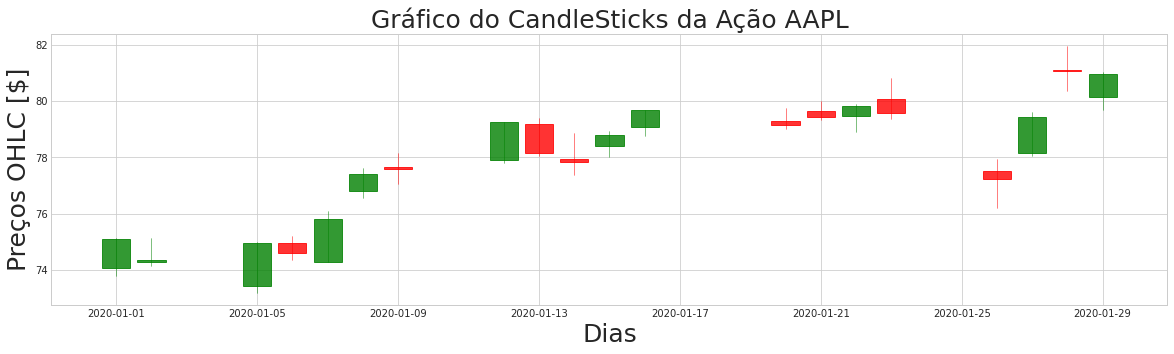

In [4]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

fig = plt.subplots(figsize=(20,5))

plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(111)
candlestick_ohlc(ax1, df1.values[:20], width=0.8, colorup='g', colordown='r',alpha=0.8)
ax1.set_xlabel("Dias",fontsize=25)
ax1.set_ylabel('Preços OHLC [$]',fontsize=25)
ax1.set_title('Gráfico do CandleSticks da Ação '+'AAPL',fontsize=25) 
ax1.xaxis_date()

<div id="MM">
    <h2>3) Indicador Média Móvel (MM)</h2>
</div>

  

<p>Em processamento de sinais, a média móvel é um filtro FIR (Finite Impulse Response) passa-baixas, sendo as variações mais recorrentes a média móvel simples - SMA, exponencial - EMA e a ponderada - WMA</p>
    
  <p> Média Móvel simples $SMA[n]$ </p> &emsp;
  <li>$SMA[n]=\frac{1}{N}\sum_{k=n-N}^{n} p[k]$, onde $N$ é o periodo da SMA </li>
,
  <p> Média Móvel Exponencial $EMA[n]$ </p> &emsp;
  <li>$EMA[n]=\alpha p[n]+(1-\alpha) EMA[n-1]$, onde $N$ é o periodo da EMA </li>
  
  <p> Média Móveis $VWAP[n]$ </p> &emsp;
  <li>$VWAP[n]=\frac{\sum_{k=n-N}^{n} p[k]v[k]}{\sum_{k=n-N}^{n} v[k]}$, onde $N$ é o periodo da VWAP </li>

<h><a href="#Tópicos">^^Tópicos^^</a></h> 

Text(0.5, 1.0, 'Gráfico do Preço de Fechamento')

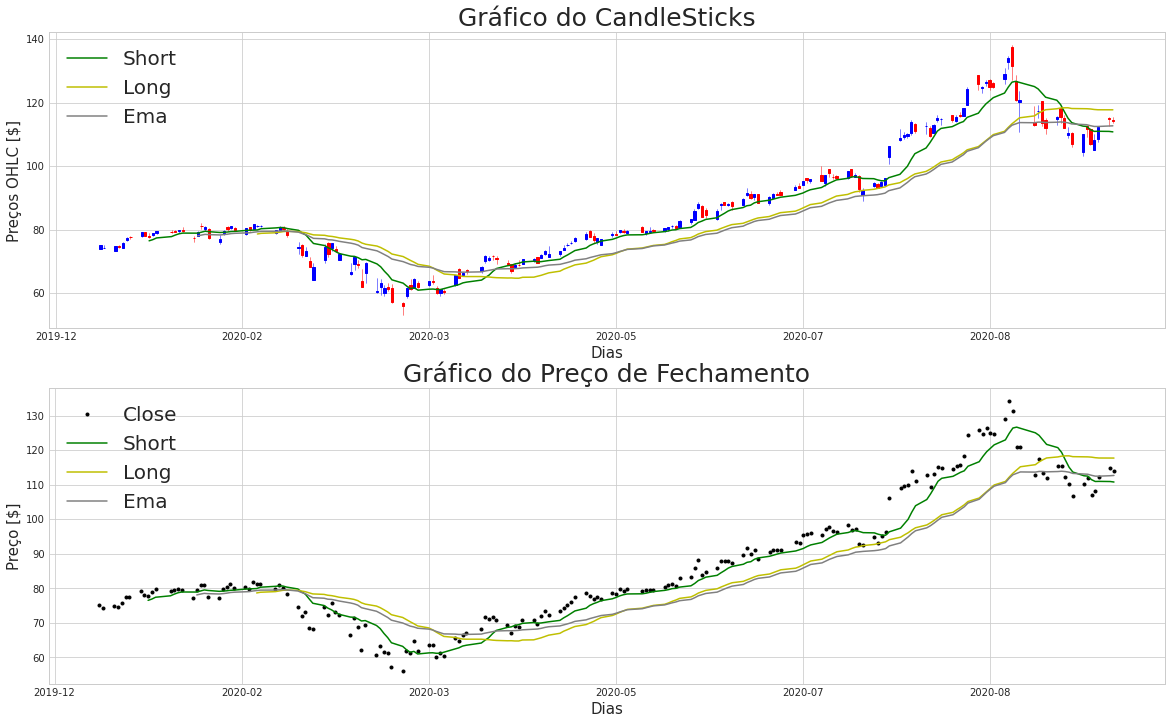

In [5]:
%matplotlib inline

def ema(data, period=0, column='close'):
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()    
    return data

mean_short=10
mean_long=30

close_mean_short = df1.close.rolling(window=mean_short).mean()
close_mean_long = df1.close.rolling(window=mean_long).mean()

fig = plt.subplots(figsize=(20,12))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='b', colordown='r',alpha=1)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.plot(df1['Date'], close_mean_short, color = 'green', label = 'Short')
ax1.plot(df1['Date'], close_mean_long, color = 'y', label = 'Long')
ax1.plot(df1['Date'], ema(df1,18)['ema18'], color = 'gray', label = 'Ema')
ax1.legend(loc='upper left',fontsize=20)

ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Preços OHLC [$]',fontsize=15)
ax1.set_title('Gráfico do CandleSticks',fontsize=25) 

ax2 = plt.subplot(212)
ax2.plot(df1['Date'], df1.close, 'k.', label = 'Close')
ax2.plot(df1['Date'], close_mean_short, color = 'green', label = 'Short')
ax2.plot(df1['Date'], close_mean_long, color = 'y', label = 'Long')
ax2.plot(df1['Date'], ema(df1,18)['ema18'], color = 'gray', label = 'Ema')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.legend(loc='upper left',fontsize=20)

ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Preço [$]',fontsize=15)
ax2.set_title('Gráfico do Preço de Fechamento',fontsize=25) 

<div id="MACD">
    <h2>4) Indicador Convergência e Divergência de Médias Móveis (MACD)</h2>
</div>

 

Desenvolvido por <b> Gerald Appel </b> no final dos anos 70, o MACD (Moving Average Convergence / Divergence Oscillator) transforma dois seguidores de tendência, médias móveis, em um oscilador de momento, subtraindo a média móvel longa da curta. Assim, o MACD oferece um seguidor de tendências e momento. O MACD opera acima e abaixo da linha zero, à medida que as médias móveis convergem, cruzam e divergem. Normalmente, traders buscam cruzamentos de linha de sinal, cruzamentos de linha central e divergências para gerar sinais para suas operações. Porém, como o MACD não tem limites, superiores e inferiores, é de pouca ou nenhuma utilidade para identificar níveis de sobrecompra e sobrevenda.




  <p> Valor <b>MACD</b>  </p>&emsp;
  <li>$MACD = MME_{12}(close)-MME_{26}(close)$  </li>
 
   <p>Valor <b>Linha de Sinal</b> </p> &emsp;
   <li>$Sinal=MME_9(MACD)$</li> 
   
   <p>MACD <b>Histograma</b> </p>
   
   <li>$MACD_H=MACD-Sinal$</li> 

<b>Entradas da função: </b>  
<ol> 
  <li><b>data</b>: DataFrame com os preços </li> &emsp;
  <li><b>period_long</b>: periodo longo EMA (26 dias clássico) </li> &emsp;
  <li><b>period_short</b>: periodo curto EMA (12 dias clássico) </li> &emsp;
  <li><b>period_signal</b>: sinal de linha EMA (9 dias clássico)</li> &emsp;
  <li><b>column</b>: preço de fechamento (clássico)</li> &emsp;
</ol>
<b>Saídas da Função:</b>
<ol> 
  <li>DataFrame com os valores de <b>'macd_val'</b> e <b>'macd_signal_line'</b></li> &emsp;
</ol>
<b>Source:</b>
<ol> 

   <a href="http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:moving_average_convergence_divergence_macd">
  <li> <b>Technical_indicators:moving_average_convergence_divergence_macd</b> </li>
  <a href="https://github.com/voice32/stock_market_indicators/blob/master/indicators.py">
  <li> <b>github.com/voice32/stock_market_indicators/blob/master/indicators.py</b> </li>   
    
    
    
    
</ol>
<h><a href="#Tópicos">^^Tópicos^^</a></h> 

In [6]:
def ema(data, period=0, column='close'):
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()    
    return data

def macd(data, period_long=26, period_short=12, period_signal=9, column='close'):
    remove_cols = []
    if not 'ema' + str(period_long) in data.columns:
        data = ema(data, period_long)
        remove_cols.append('ema' + str(period_long))

    if not 'ema' + str(period_short) in data.columns:
        data = ema(data, period_short)
        remove_cols.append('ema' + str(period_short))

    data['macd_val'] = data['ema' + str(period_short)] - data['ema' + str(period_long)]
    data['macd_signal_line'] = data['macd_val'].ewm(ignore_na=False, min_periods=0, com=period_signal, adjust=True).mean()

    data = data.drop(remove_cols, axis=1)
        
    return data

        Date    open    high     low   close       ema18       ema26  \
183  18527.0  111.62  112.11  106.77  107.12  112.730002  109.710852   
184  18528.0  105.17  110.25  105.00  108.22  112.492623  109.655583   
185  18529.0  108.43  112.44  107.67  112.28  112.481432  109.752871   
186  18532.0  115.01  115.32  112.78  114.96  112.611888  109.945894   
187  18533.0  114.55  115.31  113.57  114.09  112.689687  110.099507   

          ema12  macd_val  macd_signal_line  
183  114.122788  4.411936          7.016557  
184  113.668727  4.013143          6.716215  
185  113.561902  3.809031          6.425497  
186  113.669448  3.723554          6.155303  
187  113.701798  3.602291          5.900001  


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Indicador MACD')

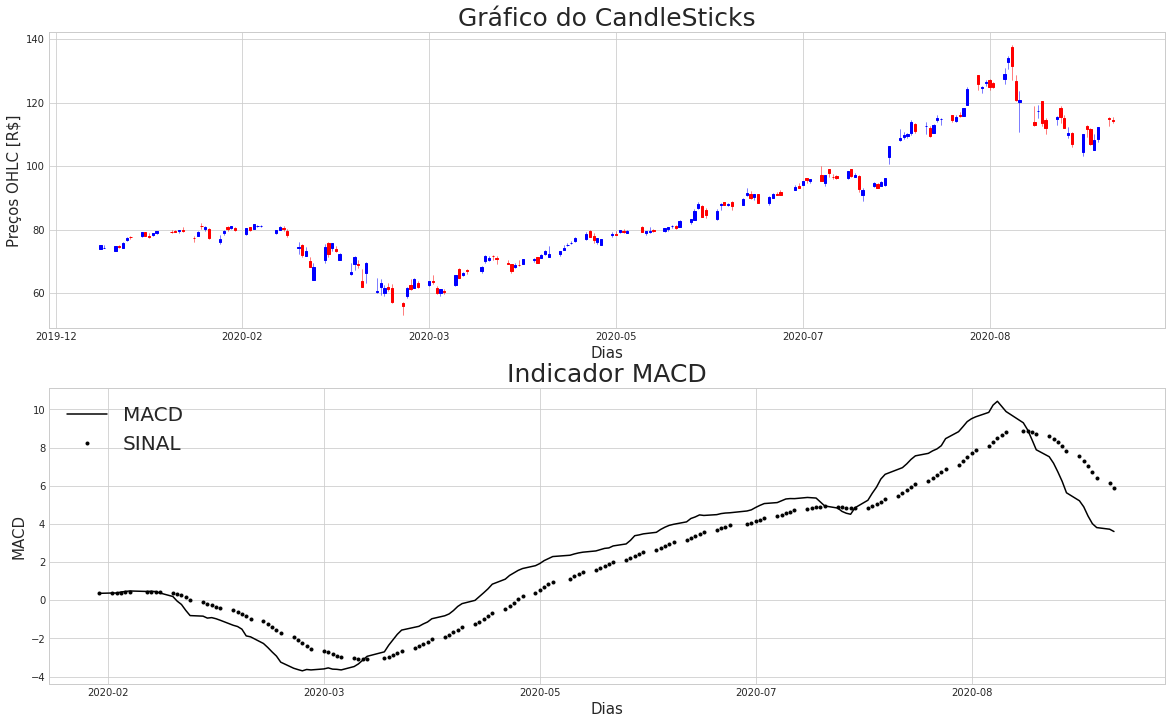

In [7]:
df_macd=df1.copy()
macd(df_macd)

print(df_macd.tail())
fig = plt.subplots(figsize=(20,12))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='b', colordown='r')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend(loc='upper left')
ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=15)
ax1.set_title('Gráfico do CandleSticks',fontsize=25) 

ax2 = plt.subplot(212)
ax2.plot(df_macd['Date'], df_macd.macd_val, 'k', label = 'MACD')
ax2.plot(df_macd['Date'], df_macd.macd_signal_line, 'k.', label = 'SINAL')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.legend(loc='upper left',fontsize=20)

ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('MACD',fontsize=15)
ax2.set_title('Indicador MACD',fontsize=25) 

<div id="RSI">
    <h2>5) Indicador Índice de Força Relativa (RSI)</h2>
</div>

  

O índice de força relativa foi desenvolvido por <b>J. Welles Wilder</b> e publicado em um livro de 1978, New Concepts in Technical Trading Systems, na edição de junho de 1978.
 O RSI é classificado como um oscilador de momento, medindo a velocidade e magnitude dos movimentos de preços direcionais. O RSI calcula a força da razão entre fechamento mais alto e fechamento mais baixo, localizando sua intensidade entre zero (sobrevendido) e um (sobrecomprado).

 <p> Valor <b>RSI</b>  </p>&emsp;
  <li>$RSI = 100 -\frac{100} {1+\frac{R_U}{R_D}} $  </li>&emsp;
   <li>$R_U=\frac{Número \ de \ candles \ de \ ganhos \ no \ período \ n}{n} $,  
 $R_D=\frac{Número \ de \ candles \ de \ perdas \ no \ período \ n}{n} $ </li>
  


<b>Entradas da função: </b>  
<ol> 
  <li><b>data</b>: DataFrame com os preços </li> &emsp;
  <li><b>periods</b>: periodo para calculo do RSI (14 dias clássico) </li> &emsp;
</ol>
<b>Saída da Função:</b>
<ol> 
  <li>DataFrame com os valores do <b>'rsi'</b></li> &emsp;
</ol>
<b>Source:</b>
<ol> 
    

  <a href="https://github.com/voice32/stock_market_indicators/blob/master/indicators.py">
  <li> <b>github.com/voice32/stock_market_indicators/blob/master/indicators.py</b> </li>   
    
    
    

</ol>


<h><a href="#Tópicos">^^Tópicos^^</a></h> 

In [8]:
def rsi(data, periods=14, close_col='close'):
    data['rsi_u'] = 0.
    data['rsi_d'] = 0.
    data['rsi'] = 0.
    
    for index,row in data.iterrows():
        if index >= periods:
            
            prev_close = data.at[index-periods, close_col]
            if prev_close < row[close_col]:
              #  data.set_value(index, 'rsi_u', row[close_col] - prev_close)
                data.at[index, 'rsi_u']=row[close_col] - prev_close               
            elif prev_close > row[close_col]:
              #  data.set_value(index, 'rsi_d', prev_close - row[close_col])
                data.at[index, 'rsi_d']=prev_close - row[close_col]
            
    data['rsi'] = 100*data['rsi_u'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean() / (data['rsi_u'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean() 
                                                                                                        + data['rsi_d'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean())
    
    data = data.drop(['rsi_u', 'rsi_d'], axis=1)
        
    return data

        Date    open    high     low   close       ema18  rsi_u  rsi_d  \
183  18527.0  111.62  112.11  106.77  107.12  112.730002   0.00  24.28   
184  18528.0  105.17  110.25  105.00  108.22  112.492623   0.00  12.66   
185  18529.0  108.43  112.44  107.67  112.28  112.481432   0.00   8.68   
186  18532.0  115.01  115.32  112.78  114.96  112.611888   2.14   0.00   
187  18533.0  114.55  115.31  113.57  114.09  112.689687   0.00   3.23   

           rsi  
183  41.619768  
184  39.072227  
185  37.390957  
186  38.094605  
187  37.414601  


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Indicador RSI [0-1]')

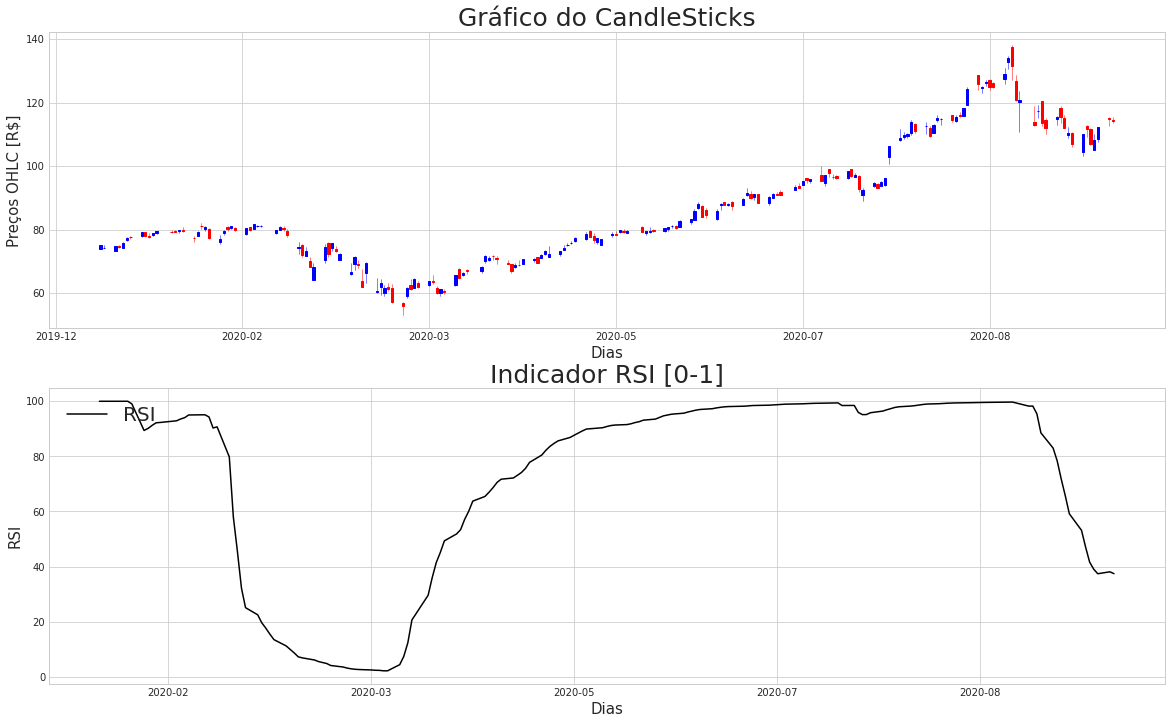

In [9]:
df_rsi=df1.copy()
rsi(df_rsi)

print(df_rsi.tail())
fig = plt.subplots(figsize=(20,12))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='b', colordown='r')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend(loc='upper left')
ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=15)
ax1.set_title('Gráfico do CandleSticks',fontsize=25) 

ax2 = plt.subplot(212)
ax2.plot(df_rsi['Date'], df_rsi.rsi, 'k', label = 'RSI')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2.legend(loc='upper left',fontsize=20)

ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('RSI',fontsize=15)
ax2.set_title('Indicador RSI [0-1]',fontsize=25) 



<div id="ATR">
    <h2>6) Indicador Média de Amplitude de Variação (ATR)</h2>
</div>


O ATR é um indicador de volatilidade da análise técnica desenvolvido originalmente por <b>J. Welles Wilder, Jr</b>. para commodities. O indicador não fornece uma indicação da tendência dos preços, simplesmente o grau de volatilidade dos preços. 


  <p> O intervalo de negociação é definido  </p>&emsp;
<li>$TR = max[(high-low),abs(high-close_{prev}),abs(low-close_{prev})]$  </li>
 
  <p>O ATR no momento $t$ é calculado usando a seguinte fórmula </p> &emsp;
   <li>$ATR_t=\frac{ATR_{t-1}x(n-1)+TR_t}{n}$</li> 




 <p>O primeiro valor de ATR é calculado por</p> &emsp;
   <li>$ATR=\frac{1}{n}\sum_{i=1}^{n} TR_i$</li> &emsp; 

   <b>Entradas da função: </b>  


<ol> 
 
    
  <li><b>trend_periods</b>: período do ATR </li> &emsp;
  <li><b>open_col</b>: coluna do Preço OPEN</li> &emsp;
  <li><b>high_col</b>: coluna do Preço HIGH </li> &emsp;
  <li><b>low_col</b>: coluna do Preço LOW </li> &emsp;
  <li><b>close_col</b>: coluna do Preço CLOSE  </li> &emsp;
  <li><b>drop_tr</b>: salvar ou não 'true_range' no DataFrame </li> &emsp;

</ol>

<b>Saída da função:</b>
   

<ol> 
 
    
  <li>DataFrame com os valores do <b>'atr'</b></li> ou <b>'true_range'</b> (<b>'true_range'</b> se 'drop_tr' == True)</li> 


</ol>

<b>Fontes:</b>



  <a href="https://en.wikipedia.org/wiki/Average_true_range">
  <li> <b>wikipedia.org/wiki/Average_true_range</b> </li>   
    
  <a href="https://github.com/voice32/stock_market_indicators/blob/master/indicators.py">
  <li> <b>github.com/voice32/stock_market_indicators/blob/master/indicators.py</b> </li>   








<ol> 
 


<h><a href="#Tópicos">^^Tópicos^^</a></h> 


In [10]:
def average_true_range(data, trend_periods=14, open_col='open', high_col='high', low_col='low', close_col='close', drop_tr = True):
    for index, row in data.iterrows():
        prices = [row[high_col], row[low_col], row[close_col], row[open_col]]
        if index > 0:
            val1 = np.amax(prices) - np.amin(prices)
            val2 = abs(np.amax(prices) - data.at[index - 1, close_col])
            val3 = abs(np.amin(prices) - data.at[index - 1, close_col])
            true_range = np.amax([val1, val2, val3])

        else:
            true_range = np.amax(prices) - np.amin(prices)

      #  data.set_value(index, 'true_range', true_range)
        data.at[index, 'true_range']=true_range
    data['atr'] = data['true_range'].ewm(ignore_na=False, min_periods=0, com=trend_periods, adjust=True).mean()
    if drop_tr:
        data = data.drop(['true_range'], axis=1)
        
    return data

        Date    open    high     low   close       ema18       ema26  \
183  18527.0  111.62  112.11  106.77  107.12  112.730002  109.710852   
184  18528.0  105.17  110.25  105.00  108.22  112.492623  109.655583   
185  18529.0  108.43  112.44  107.67  112.28  112.481432  109.752871   
186  18532.0  115.01  115.32  112.78  114.96  112.611888  109.945894   
187  18533.0  114.55  115.31  113.57  114.09  112.689687  110.099507   

          ema12  macd_val  macd_signal_line  
183  114.122788  4.411936          7.016557  
184  113.668727  4.013143          6.716215  
185  113.561902  3.809031          6.425497  
186  113.669448  3.723554          6.155303  
187  113.701798  3.602291          5.900001  


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Indicador ATR')

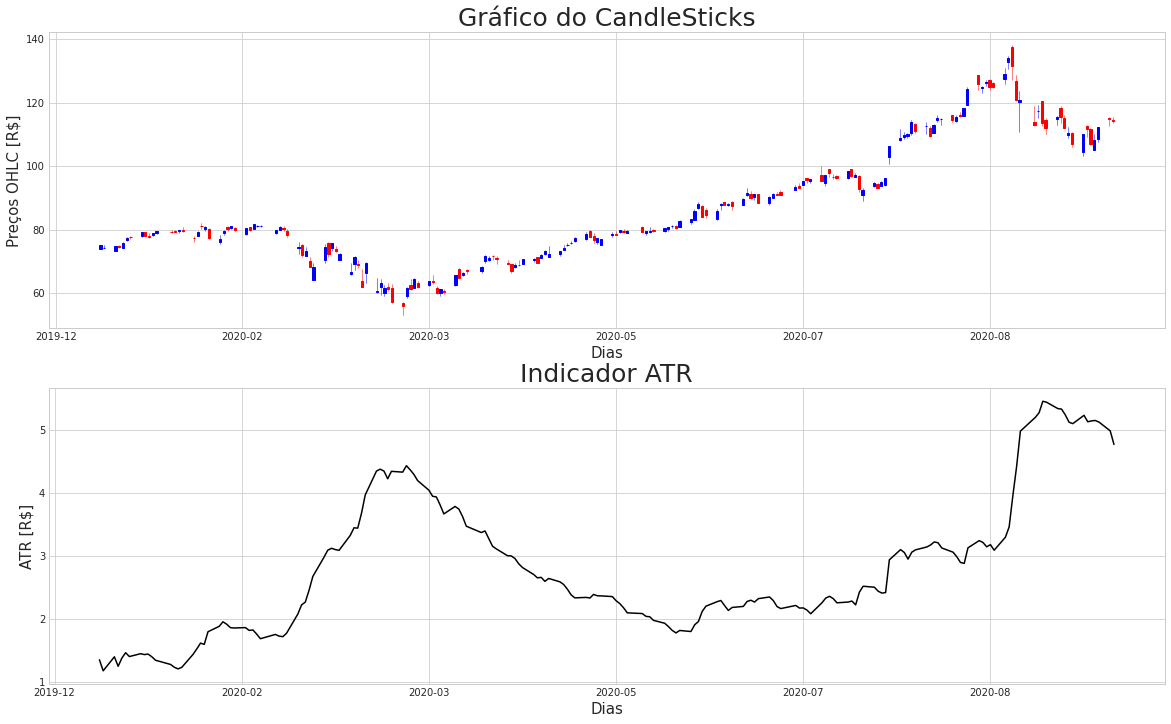

In [11]:
df_average_true_range=df1.copy()
average_true_range(df_average_true_range)

print(df_macd.tail())
fig = plt.subplots(figsize=(20,12))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='b', colordown='r')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend(loc='upper left')
ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=15)
ax1.set_title('Gráfico do CandleSticks',fontsize=25) 


ax2 = plt.subplot(212)
ax2.plot(df_average_true_range['Date'], df_average_true_range.atr, 'k', label = 'ATR')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#ax2.legend(loc='upper left',fontsize=20)

ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('ATR [R$]',fontsize=15)
ax2.set_title('Indicador ATR',fontsize=25) 

<div id="Bollinger Bands">
    <h2>7) Indicador Bandas de Bollinger (BB)</h2>
</div>


   

<p>O indicador Bandas Bollinger foi criado por <b>John Bollinger</b> no início dos anos 80. Este indicador possui relação com a volatilidade ou o risco e permite sua comparação com os níveis de preços durante o período de tempo.</p>

  <p> Equações Básicas </p>&emsp;
 
  <li> $\mu = E\{p\}=\frac{1}{n}\sum_{i=1}^{n} p_i $  </li> &emsp;
  
  <li> $\sigma = (E\{p^2 \}-\mu^2)^{1/2}=\sqrt{\frac{1}{n}\sum_{i=1}^{n} (p_i-\mu)^2} $  </li> 
 
   <p>As <b>Bandas de Bollinger</b> são aplicações em janelas sucessivas de tamanho $n$ com</p> &emsp;
   <li>$upperband=\mu+2\sigma$</li>   
   
   <li>$lowerband=\mu-2\sigma$</li> 
   
   <li>$middleband=\mu$</li>    

<b>Entradas da função: </b>  
<ol> 
  <li><b>data</b>: DataFrame com os preços </li> &emsp;
  <li><b>trend_periods</b>: periodo da Bandas de Bollinger </li> &emsp;
    <li><b>deviation</b>: multiplicador do desvio padrão </li> &emsp;
  <li><b>close_col</b>: coluna do Preço CLOSE </li> &emsp;
 
</ol>
<b>Saídas da Função:</b>
<ol> 
  <li>DataFrame com os valores de <b>'bol_bands_middle'</b>, <b>'bol_bands_upper'</b> e <b>'bol_bands_lower'</b>&emsp;
</ol>
<b>Fonte:</b>
<ol> 

 <a href="https://github.com/voice32/stock_market_indicators/blob/master/indicators.py">
  <li> <b>github.com/voice32/stock_market_indicators/blob/master/indicators.py</b> </li>   


  
</ol>
<h><a href="#Tópicos">^^Tópicos^^</a></h> 




In [12]:
def bollinger_bands(data, trend_periods=20, deviation=2, close_col='close'):

    data['bol_bands_middle'] = data[close_col].ewm(ignore_na=False, min_periods=0, com=trend_periods, adjust=True).mean()
    for index, row in data.iterrows():

        s = data[close_col].iloc[index - trend_periods: index]
        sums = 0
        middle_band = data.at[index, 'bol_bands_middle']
        for e in s:
            sums += np.square(e - middle_band)

        std = np.sqrt(sums / trend_periods)
   #     d = 2
        upper_band = middle_band + (deviation * std)
        lower_band = middle_band - (deviation * std)

      #  data.set_value(index, 'bol_bands_upper', upper_band)
      #  data.set_value(index, 'bol_bands_lower', lower_band)
        data.at[index, 'bol_bands_upper']=upper_band
        data.at[index, 'bol_bands_lower']=lower_band

    return data

        Date    open    high     low   close       ema18  bol_bands_middle  \
183  18527.0  111.62  112.11  106.77  107.12  112.730002        112.031778   
184  18528.0  105.17  110.25  105.00  108.22  112.492623        111.850243   
185  18529.0  108.43  112.44  107.67  112.28  112.481432        111.870710   
186  18532.0  115.01  115.32  112.78  114.96  112.611888        112.017835   
187  18533.0  114.55  115.31  113.57  114.09  112.689687        112.116520   

     bol_bands_upper  bol_bands_lower  
183       132.554466        91.509090  
184       131.898355        91.802130  
185       130.862445        92.878975  
186       129.935093        94.100577  
187       129.059191        95.173848  


Text(0.5, 1.0, 'Indicador Bandas de Bollinger')

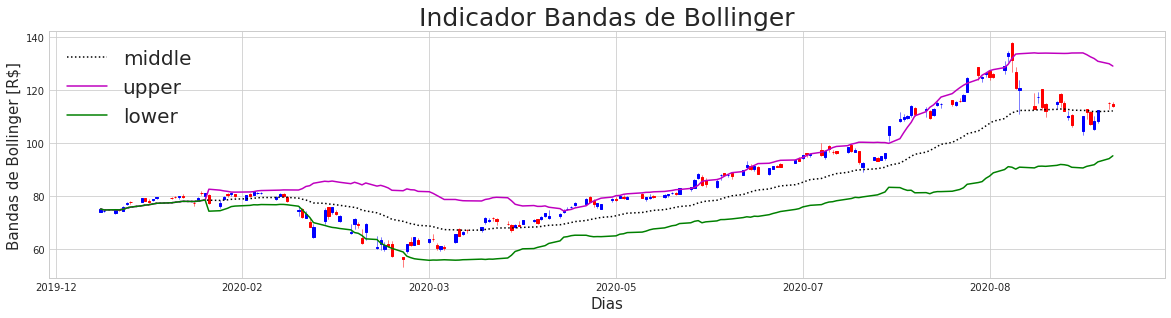

In [13]:
df_bollinger_bands=df1.copy()
bollinger_bands(df_bollinger_bands)

print(df_bollinger_bands.tail())
fig = plt.subplots(figsize=(20,10))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='b', colordown='r')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=15)
ax1.set_title('Gráfico do CandleSticks',fontsize=25) 


ax1.plot(df_bollinger_bands['Date'], df_bollinger_bands.bol_bands_middle, 'k:', label = 'middle')
ax1.plot(df_bollinger_bands['Date'], df_bollinger_bands.bol_bands_upper, 'm', label = 'upper')
ax1.plot(df_bollinger_bands['Date'], df_bollinger_bands.bol_bands_lower, 'g', label = 'lower')

ax1.legend(loc='upper left',fontsize=20)

ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Bandas de Bollinger [R$]',fontsize=15)
ax1.set_title('Indicador Bandas de Bollinger',fontsize=25) 

<div id="MMF">
    <h2>8) Indicador Média Móvel no Domíno das Frequências</h2>
</div>

<p>Representando a simple Moving Average (SMA) como um sistema Linear Discreto Invariante no Tempo [SLDIT]</p>&emsp;


 
  <li> $SMA[n]=h[n]*p[n]=\sum_{m=-\infty}^{\infty} h[m]p[n-m]$ </li> 
  
  <p>onde $*$ é a convolução e o $h[n]$ a resposta ao impulso unitário.</p>
  
  <li> $h[n] = \left \{ \begin{matrix} \frac{1}{N}, & \mbox{se }n, \mbox{ $0 \leq  n  \leq   N-1$} \\ 0, & \mbox{se }n, \mbox{ Caso contrário} \end{matrix} \right.$   </li> 
 
   <p>No domínio da Frequência, aplicando a transformada de Fourier em tempo discreto:</p> &emsp;
   <li>$H(e^{j\omega})=\mathscr{F}\{h[n]\}=\sum_{k=-\infty}^{\infty} h[n]e^{-j\omega n}$ </li>   
   
   <li>$H(e^{j\omega})=e^{-j\omega (N-1)/2}\frac{1}{N}\frac{\sin(N \omega /2)}{\sin(\omega /2)}$ </li> 
   
 

<p>Representação da Magnitude em Frequência da SNA </p>  

  <li>$\left|H(e^{j\omega})\right|=\frac{1}{N}\frac{\sin(N \omega /2)}{\sin(\omega /2)}$ </li> 
 
 <p>Complementarmente, representação da Magnitude em Frequência da EMA </p>
<li>$\left|H(e^{j\omega})\right|=\left|\frac{\alpha}{1-(1-\alpha)e^{-j\omega}}\right|$ </li>

<h><a href="#Tópicos">^^Tópicos^^</a></h> 




/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


Text(0.5, 1.0, 'Resposta em Frequencia dos Sinais de Médias Móveis Simples')

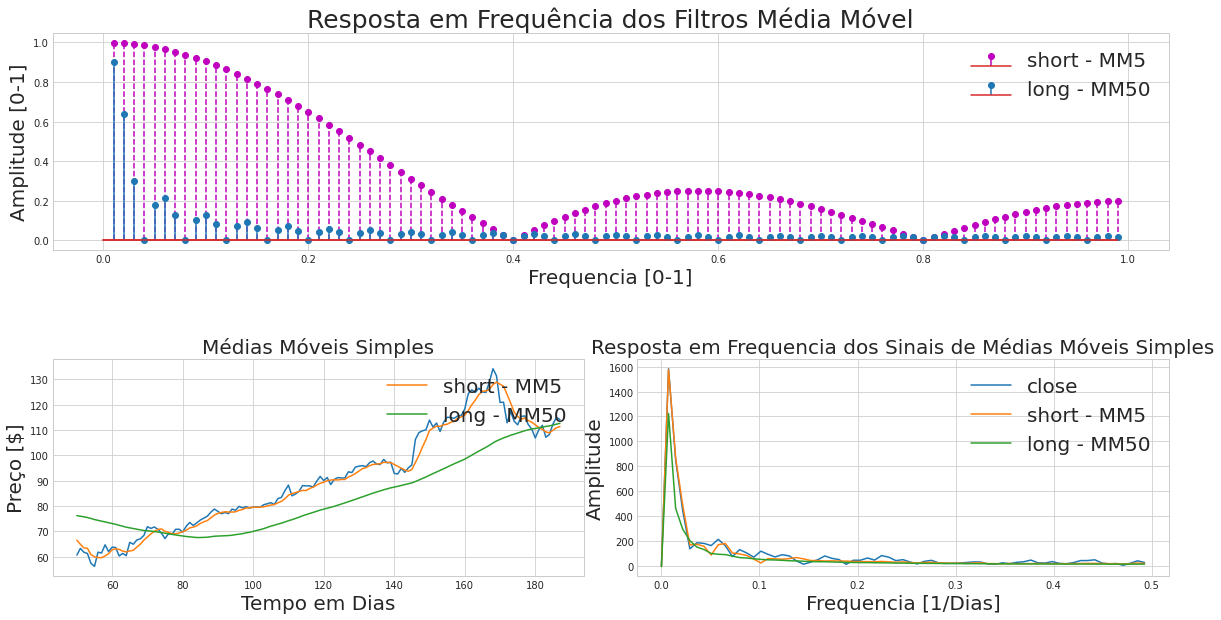

In [15]:
import math as mt  
def response_frequency(sinal,fs): 
        rf = np.abs(np.fft.fft(sinal))
        tp=np.arange(0,len(sinal)/fs,1/fs)
        fq = np.fft.fftfreq(tp.shape[-1])
        return fq, rf
 
omega=mt.pi*np.array(range(-100,100))/100

N1=5
SMA_short=np.exp(-1j*omega*(N1-1)/2)*(1/N1)*(np.sin(N1*omega/2)/np.sin(omega/2))
N2=50
SMA_long=np.exp(-1j*omega*(N2-1)/2)*(1/N2)*(np.sin(N2*omega/2)/np.sin(omega/2))

fig = plt.subplots(figsize=(20,10))
plt.subplots_adjust(wspace=.1, hspace=.5)

mean_short=N1
mean_long=N2

ax1=plt.subplot(2, 1, 1)  
ax1.stem(omega[int(-len(omega)/2):]/mt.pi, (abs(SMA_short[int(-len(omega)/2):])),linefmt='m--',markerfmt='mo', label='short - MM'+str(N1))
ax1.stem(omega[int(-len(omega)/2):]/mt.pi, (abs(SMA_long[int(-len(omega)/2):])), label='long - MM'+str(N2))
ax1.set_ylabel('Amplitude [0-1]',fontsize=20)
ax1.set_xlabel('Frequencia [0-1]',fontsize=20)
ax1.set_title('Resposta em Frequência dos Filtros Média Móvel',fontsize=25)
ax1.legend(loc='upper right',fontsize=20)

ax2=plt.subplot(2, 2, 3)  
close_mean_short = df1.close.rolling(window=mean_short).mean()
close_mean_long = df1.close.rolling(window=mean_long).mean()
ax2.plot(df1.close[N2:])
ax2.plot(close_mean_short[N2:],label='short - MM'+str(N1))
ax2.plot(close_mean_long[N2:],label='long - MM'+str(N2))
ax2.legend(loc='upper right',fontsize=20)

ax2.set_ylabel('Preço [$]',fontsize=20)
ax2.set_xlabel('Tempo em Dias',fontsize=20)
ax2.set_title('Médias Móveis Simples',fontsize=20)
ax3=plt.subplot(2, 2, 4)  

fs=1

fq, rf=response_frequency(df1.close[N2:]-df1.close[N2:].mean(),fs)
fq_short, rf_short=response_frequency(close_mean_short[N2:]-close_mean_short[N2:].mean(),fs)
fq_long, rf_long=response_frequency(close_mean_long[N2:]-close_mean_long[N2:].mean(),fs)

ax3.plot(fs*fq[:np.min(np.where(fq<0))],rf[:np.min(np.where(fq<0))],label='close')
ax3.plot(fs*fq_short[:np.min(np.where(fq_short<0))],rf_short[:np.min(np.where(fq_short<0))],label='short - MM'+str(N1))
ax3.plot(fs*fq_long[:np.min(np.where(fq_long<0))],rf_long[:np.min(np.where(fq_long<0))],label='long - MM'+str(N2))
ax3.legend(loc='upper right',fontsize=20)
ax3.set_ylabel('Amplitude',fontsize=20)
ax3.set_xlabel('Frequencia [1/Dias]',fontsize=20)
ax3.set_title('Resposta em Frequencia dos Sinais de Médias Móveis Simples',fontsize=20)

<b>Fim da Atividade!!!</b> 
